In [1]:
import pandas as pd
from datetime import date
import datetime
import numpy as np
from dateutil.relativedelta import relativedelta
from matplotlib import pyplot as plt

weather_start_year = 2010
end_dt = '2019-03-31'
# #2 months:
# start_dt = '2019-02-01'

#6 months:
# start_dt = '2018-10-01'

# 12 months:
# start_dt = '2018-04-01'

# #24 months:
# start_dt = '2017-04-01'

# # #60 months:
start_dt = '2014-04-01'

weekdays =['Pon', 'Wt', 'Sr', 'Czw', 'Pt', 'Sb', 'Nd']

def dzienTyg(dzienNum):
    if dzienNum == 0:
        return 'Pon'
    elif dzienNum == 1:
        return 'Wt'
    elif dzienNum == 2:
        return 'Sr'
    elif dzienNum == 3:
        return 'Czw'
    elif dzienNum == 4:
        return 'Pt'
    elif dzienNum == 5:
        return 'Sb'
    elif dzienNum == 6:
        return 'Nd'
    else:
        return 'Blad'
def date_fromisofromat(dt):
    y = int(dt[0: 4])
    m = int(dt[5: 7])
    d = int(dt[8:10])
    return date(y,m,d)

def combineData(start, end):
    startDt = date_fromisofromat(start)
    endDt   = date_fromisofromat(end)
    d = datetime.timedelta(days=1)
    m = relativedelta(months=+1)

    in_table = pd.read_csv(filepath_or_buffer= '../Data/20100301-20100331.csv', 
                       sep=';', 
                       engine='python')
    in_table= in_table.iloc[0:0] #drop all rows, leave columns

    while(startDt <= endDt):
        fileName = str(startDt).replace('-','') + '-' + str(startDt + m - d).replace('-','') + '.csv'
        in_table1 = pd.read_csv(filepath_or_buffer= '../Data/' +fileName, 
                           sep=';', 
                           engine='python')
        in_table = in_table.append(in_table1,ignore_index=True)
        startDt = startDt + relativedelta(months=+1)

    in_table['Krajowe zapotrzebowanie na moc'] = in_table['Krajowe zapotrzebowanie na moc'].apply(lambda x: x.replace(',','.'))
    in_table['Krajowe zapotrzebowanie na moc'] = in_table['Krajowe zapotrzebowanie na moc'].astype(float)
    in_table['Rok']     = in_table['Data'].apply(lambda x: x[0: 4]).astype(int)
    in_table['Miesiac'] = in_table['Data'].apply(lambda x: x[5: 7]).astype(int)
    in_table['Dzien']   = in_table['Data'].apply(lambda x: x[8:10]).astype(int)
    # in_table['Godz_mies']=(in_table['Dzien']-1)*24 +in_table['Godzina']
    return in_table
#     plt.show()
# Data, Godzina, Krajowe zapotrzebowanie na moc, Sumaryczna generacja JWCD, 
# Generacja PI, Generacja IRZ, Sumaryczna generacja nJWCD, 
# Krajowe saldo wymiany międzysystemowej równoległej, 
# Krajowe saldo wymiany międzysystemowej nierównoległej, 

dataAll = combineData(start_dt, end_dt)
dataAll = dataAll.loc[dataAll['Godzina'] != '2A']

dataAll['Godzina'] = dataAll['Godzina'].apply(
    lambda x: (int(str(x))) 
)
dataAll['weekDayNum'] = dataAll['Data'].apply(
    lambda x: (date_fromisofromat(x).weekday())
)
dataAll['weekDay'] = dataAll['Data'].apply(
    lambda x: dzienTyg(date_fromisofromat(x).weekday())
)
dataAll['DataGodz'] = pd.to_datetime(dataAll['Data']) 

dataAll['DataGodz'] = dataAll['DataGodz'] + dataAll['Godzina'].apply(
    lambda x: relativedelta(hours=x)
)
dataAll['Godzina w tygodniu'] = dataAll.apply(
    lambda x: x['Godzina'] + 24*date_fromisofromat(x['Data']).weekday()
    ,axis=1
)
dataAll['weekend flag'] = dataAll['weekDayNum'].apply(
    lambda x: 'weekend' if x>5 else 'dzień roboczy'
)
dataAll['Rok-Miesiąc'] = dataAll['Data'].apply(
    lambda x: x[0:7]
)
modelData = dataAll[['Krajowe zapotrzebowanie na moc']]

#For Arima:
modelData2 = dataAll[['Krajowe zapotrzebowanie na moc',
                      'DataGodz']] 
modelData2.set_index('DataGodz')
modelData2.index = pd.DatetimeIndex(modelData2['DataGodz'])#.to_period('H')

modelData2

D:\Programy\anaconda\lib\site-packages\pandas\core\arrays\datetimelike.py:1345: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized
  PerformanceWarning,


,Krajowe zapotrzebowanie na moc,DataGodz
DataGodz,,
2014-04-01 01:00:00,15820.063,2014-04-01 01:00:00
2014-04-01 02:00:00,15253.238,2014-04-01 02:00:00
2014-04-01 03:00:00,14943.475,2014-04-01 03:00:00
2014-04-01 04:00:00,14880.913,2014-04-01 04:00:00
2014-04-01 05:00:00,15148.463,2014-04-01 05:00:00
...,...,...
2019-03-31 20:00:00,18097.938,2019-03-31 20:00:00
2019-03-31 21:00:00,18774.000,2019-03-31 21:00:00
2019-03-31 22:00:00,17979.813,2019-03-31 22:00:00


In [2]:
dataAll

,Data,Godzina,Krajowe zapotrzebowanie na moc,Sumaryczna generacja JWCD,Generacja PI,Generacja IRZ,Sumaryczna generacja nJWCD,Krajowe saldo wymiany międzysystemowej równoległej,Krajowe saldo wymiany międzysystemowej nierównoległej,Rok,Miesiac,Dzien,weekDayNum,weekDay,DataGodz,Godzina w tygodniu,weekend flag,Rok-Miesiąc
0,2014-04-01,1,15820.063,"10655,600",-,-,"4953,238","2,150","221,063",2014,4,1,1,Wt,2014-04-01 01:00:00,25,dzień roboczy,2014-04
1,2014-04-01,2,15253.238,"10192,175",-,-,"4918,288","-6,600","160,688",2014,4,1,1,Wt,2014-04-01 02:00:00,26,dzień roboczy,2014-04
2,2014-04-01,3,14943.475,"9877,213",-,-,"4888,163","27,963","163,188",2014,4,1,1,Wt,2014-04-01 03:00:00,27,dzień roboczy,2014-04
3,2014-04-01,4,14880.913,"9821,138",-,-,"4929,075","-18,888","160,150",2014,4,1,1,Wt,2014-04-01 04:00:00,28,dzień roboczy,2014-04
4,2014-04-01,5,15148.463,"10054,638",-,-,"4942,825","13,525","152,888",2014,4,1,1,Wt,2014-04-01 05:00:00,29,dzień roboczy,2014-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43815,2019-03-31,20,18097.938,"9672,425","123,213","0,000","6775,400","383,663","1277,863",2019,3,31,6,Nd,2019-03-31 20:00:00,164,weekend,2019-03
43816,2019-03-31,21,18774.000,"10261,675","106,525","0,000","6719,713","469,050","1332,538",2019,3,31,6,Nd,2019-03-31 21:00:00,165,weekend,2019-03
43817,2019-03-31,22,17979.813,"9284,038","16,725","0,000","6838,138","541,350","1332,250",2019,3,31,6,Nd,2019-03-31 22:00:00,166,weekend,2019-03
43818,2019-03-31,23,17091.150,"8487,425","-8,475","0,000","6781,750","515,250","1322,800",2019,3,31,6,Nd,2019-03-31 23:00:00,167,weekend,2019-03


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

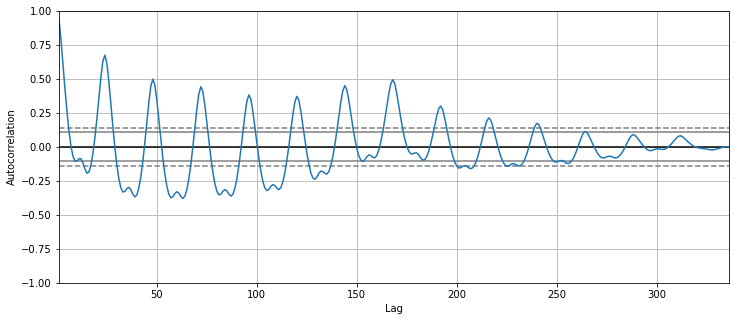

In [3]:
plt.figure(figsize=[12,5])
pd.plotting.autocorrelation_plot(modelData[0:336]) # zostawic dwa tygodnie acf,
#pcf: czesciowa autokorelacja



<Figure size 1440x360 with 0 Axes>

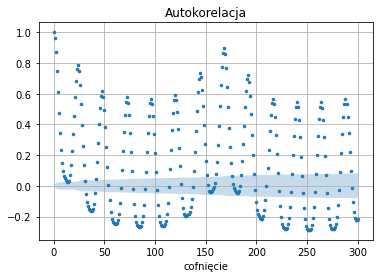

In [4]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
pyplot.figure(figsize=[20,5])
plot_acf(modelData, lags = 300, use_vlines=False, title='Autokorelacja', marker='.')
plt.grid()
plt.xlabel('cofnięcie')
plt.savefig('autokorelacja.png')

<Figure size 1440x360 with 0 Axes>

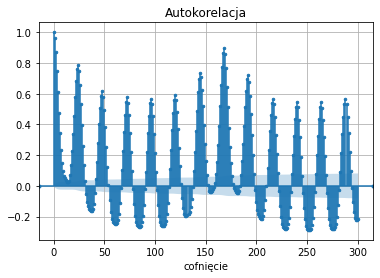

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
pyplot.figure(figsize=[20,5])
plot_acf(modelData, lags = 300, use_vlines=True, title='Autokorelacja', marker='.')
plt.grid()
plt.xlabel('cofnięcie')
plt.savefig('autokorelacja2.png')

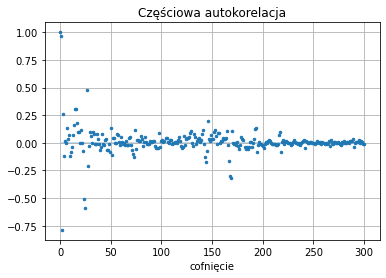

In [6]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(modelData, lags=300, use_vlines=False, title='Częściowa autokorelacja', marker='.')
plt.grid()
plt.xlabel('cofnięcie')
plt.savefig('czesciowa autokorelacja.png')

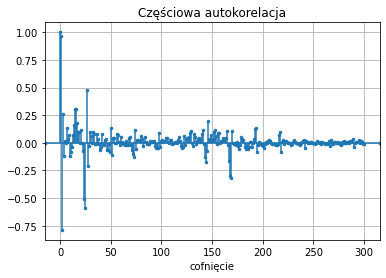

In [7]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(modelData, lags=300, use_vlines=True, title='Częściowa autokorelacja', marker='.')
plt.grid()
plt.xlabel('cofnięcie')
plt.savefig('czesciowa autokorelacja2.png')

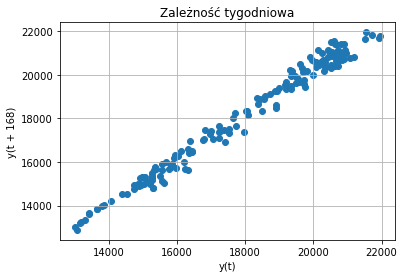

In [8]:
# plt.figure(figsize=[12,5])
pd.plotting.lag_plot(modelData[0:336],lag = 168) # zostawic dwa tygodnie acf,
plt.grid()
plt.title('Zależność tygodniowa')
plt.savefig('zaleznosc tygodniowa.png')

In [9]:
import holidays
pl_holidays = holidays.Poland()
dataAll['swieto'] = dataAll['DataGodz'].apply(lambda x: int(x in pl_holidays))

In [10]:
def kolumnaSwieto(x):
    if(x==1):
        return 'Święto'
    else:
        return 'Zwykły dzień'

In [11]:
dataAll['Święto'] = dataAll['swieto'].apply(lambda x: kolumnaSwieto(x))

### line chart - typical day, average day

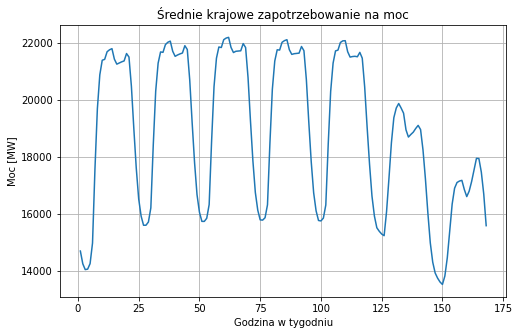

In [12]:
plt.figure(figsize=[8,5])

# modelData.plot.line()
plotdata = dataAll['Krajowe zapotrzebowanie na moc'].groupby(dataAll["Godzina w tygodniu"]).mean()
plotdata.plot.line(linestyle='-')
# plt.legend()
plt.ylabel('Moc [MW]')
plt.title('Średnie krajowe zapotrzebowanie na moc')
plt.grid()
plt.savefig('srednia po godzinie - caly tydzien.png')

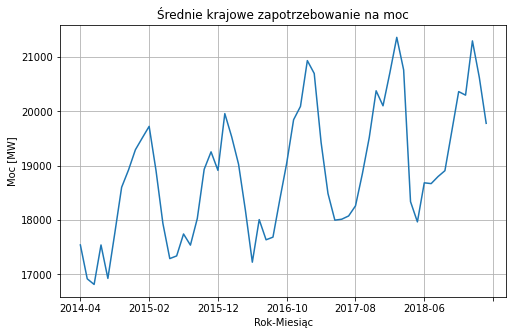

In [13]:
plt.figure(figsize=[8,5])

# modelData.plot.line()
plotdata = dataAll['Krajowe zapotrzebowanie na moc'].groupby(dataAll["Rok-Miesiąc"]).mean()
plotdata.plot.line(linestyle='-')
# plt.legend()
plt.ylabel('Moc [MW]')
plt.title('Średnie krajowe zapotrzebowanie na moc')
plt.grid()
plt.savefig('srednia po miesiacu - caly rok.png')

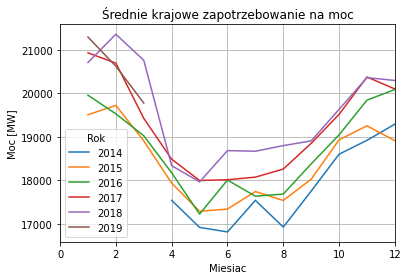

In [23]:
# import numpy as np

df = dataAll[['Krajowe zapotrzebowanie na moc', 'Rok','Miesiac']]
# print(df['M'].unique())
df = pd.pivot_table(df,
                                 values  = 'Krajowe zapotrzebowanie na moc', 
                                 columns = 'Rok', 
                                 aggfunc = np.mean,
                                 index = 'Miesiac'
                                )
df.plot.line( )
# print(dataByDaysHours)
plt.title('Średnie krajowe zapotrzebowanie na moc')
handles, labels = plt.gca().get_legend_handles_labels()
# order = [2,6,5,0,3,4,1]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])#plt.ylabel('Moc [MW]')
plt.grid()
plt.xlim((0,12))
plt.ylabel('Moc [MW]')

plt.savefig('srednia po miesiacu w poszczegolne lata.png')

In [15]:
dataAll[['Krajowe zapotrzebowanie na moc']].groupby(dataAll["Rok Miesiąc"]).mean()

KeyError: 'Rok Miesiąc'

### Bar chart - grouped by day (mean)

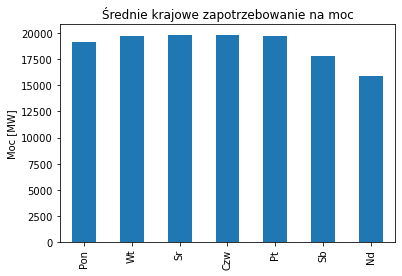

In [16]:
dataByDays = dataAll['Krajowe zapotrzebowanie na moc'].groupby(dataAll["weekDay"]).mean()
dataByDays = dataByDays.loc[weekdays]
dataByDays.plot(
    kind="bar"
#     ,x=['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
   )
#     ,x=['Poniedziałek', 'Wtorek', 'Środa', 'Czwartek', 'Piątek', 'Sobota', 'Niedziela']
plt.ylabel('Moc [MW]')
plt.title('Średnie krajowe zapotrzebowanie na moc')
# plt.grid()
plt.xlabel('')
plt.savefig('srednia po dniu tygodnia.png') # srednie z godizn roboczych

### Line chart by weekday - x=hour, y=mean(demand)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


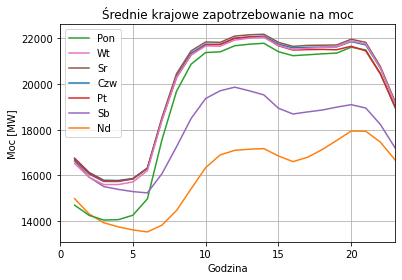

In [17]:
# import numpy as np

df = dataAll[['Krajowe zapotrzebowanie na moc', 'weekDay','Godzina']]
print(df['Godzina'].unique())
df = pd.pivot_table(df,
                                 values  = 'Krajowe zapotrzebowanie na moc', 
                                 columns = 'weekDay', 
                                 aggfunc = np.mean,
                                 index = 'Godzina'
                                )
df.plot.line( )
# print(dataByDaysHours)
plt.title('Średnie krajowe zapotrzebowanie na moc')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,6,5,0,3,4,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])#plt.ylabel('Moc [MW]')
plt.grid()
plt.xlim((0,23))
plt.ylabel('Moc [MW]')

plt.savefig('srednia po godzinie w poszczegolne dni tygodnia.png')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


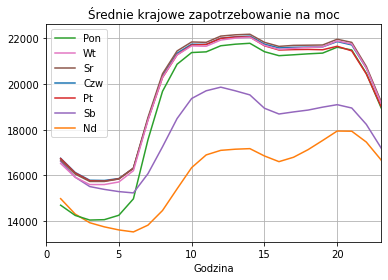

In [18]:
# import numpy as np

df = dataAll[['Krajowe zapotrzebowanie na moc', 'weekDay','Godzina']]
print(df['Godzina'].unique())
df = pd.pivot_table(df,
                                 values  = 'Krajowe zapotrzebowanie na moc', 
                                 columns = 'weekDay', 
                                 aggfunc = np.mean,
                                 index = 'Godzina'
                                )
df.plot.line( )
# print(dataByDaysHours)
plt.title('Średnie krajowe zapotrzebowanie na moc')
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,6,5,0,3,4,1]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])#plt.ylabel('Moc [MW]')
plt.grid()
plt.xlim((0,23))
plt.savefig('srednia po godzinie w poszczegolne dni tygodnia.png')

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


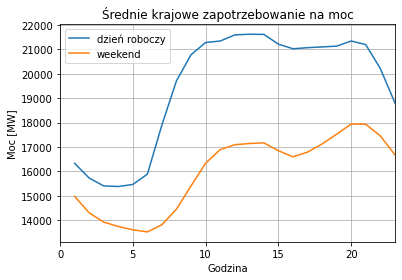

In [19]:
df = dataAll[['Krajowe zapotrzebowanie na moc', 'weekend flag','Godzina']]
print(df['Godzina'].unique())
df = pd.pivot_table(df,
                                 values  = 'Krajowe zapotrzebowanie na moc', 
                                 columns = 'weekend flag', 
                                 aggfunc = np.mean,
                                 index = 'Godzina'
                                )
df.plot.line( )
# print(dataByDaysHours)
plt.title('Średnie krajowe zapotrzebowanie na moc')
plt.legend()
plt.grid()
plt.xlim((0,23))
plt.ylabel('Moc [MW]')

plt.savefig('srednia po godzinie w dni zwykle i weekend.png')

In [20]:
dataAll['Typ dnia'] = dataAll.apply(lambda x: 'święto' if x['swieto']>0 else x['weekend flag'], axis = 1)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


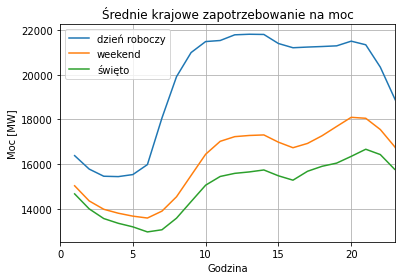

In [21]:
df = dataAll[['Krajowe zapotrzebowanie na moc', 'Typ dnia','Godzina']]
print(df['Godzina'].unique())
df = pd.pivot_table(df,
                                 values  = 'Krajowe zapotrzebowanie na moc', 
                                 columns = 'Typ dnia', 
                                 aggfunc = np.mean,
                                 index = 'Godzina'
                                )
df.plot.line( )
# print(dataByDaysHours)
plt.title('Średnie krajowe zapotrzebowanie na moc')
plt.legend()
plt.grid()
plt.xlim((0,23))
plt.ylabel('Moc [MW]')

plt.savefig('srednia po godzinie w dni zwykle, weekend i swieta.png')

In [22]:
from  pandas_profiling import ProfileReport
profile = ProfileReport(dataAll, title='Pandas Profiling Report', explorative=True)
profile.to_widgets()


KeyboardInterrupt: 

In [ ]:
df = dataAll[['Krajowe zapotrzebowanie na moc', 'Święto','Godzina']]
df = df[df[]]
print(df['Godzina'].unique())
df = pd.pivot_table(df,
                                 values  = 'Krajowe zapotrzebowanie na moc', 
                                 columns = 'Godzina', 
                                 aggfunc = np.mean,
                                 index = 'Święto'
                                )
df.boxplot( )
# print(dataByDaysHours)
plt.title('Średnie krajowe zapotrzebowanie na moc')
# plt.legend()
plt.grid()
plt.xlim((0,25))
plt.ylabel('Moc [MW]')
plt.ylabel('Godzina')
plt.savefig('srednia po godzinie boxplot.png')

In [ ]:
df

In [ ]:
rozbic na weekendy i dni pracujace